In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Начальные данные: 
* 4-вариант
* R1 := Th(Degree(x,2)*5+x*3-2); R2 := Exp((degree(x,3)+6*Degree(x,2)+12*x+8)/(2*Degree(x,2)+8*x+7)); VarF := R1+R2-2.0;
* [a, b] = [-1, 0]


Для заданной целевой функции на заданном отрезке (см. конец документа) методом дихотомии и методом золотого сечения найти:
1. Точку минимума (или в некоторых вариантах максимума).
2. Минимальное (максимальное) значение целевой функции.
Методы дихотомии и золотого сечения должны быть реализованы самостоятельно. При поиске точки минимума рассмотреть три варианта с различными значениями параметра точности поиска: ε=0,01; ε=0,00001 и 1e-17. Для каждого варианта вывести данные о количестве итераций и количестве вычисленных значений целевой функции (лучше в виде сводной таблицы). Построить график изменения интервалов неопределенности. Объяснить полученные результаты. Работа должна заканчиваться выводами.


In [3]:
# зададим функцию f
f = lambda x: np.tanh(5*x**2 + 3*x - 2) + np.exp((x**3 + 6*x**2 +12*x + 8)/(2*x**2 + 8*x + 7)) - 2.0
# зададим границ интервала
a = -1
b = 0

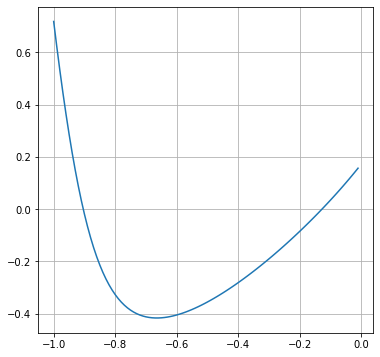

In [4]:
x = np.arange(-1, 0, 0.01)
plt.figure(figsize = (6, 6))
plt.plot(x, f(x))
plt.grid(True)

In [5]:
x_arr = np.arange(-0.8, -0.6, 1e-6)
arr = [f(x) for x in x_arr]
m = min(arr)
print(x_arr[arr.index(m)], m)

-0.6645559999961053 -0.41619761067539063


In [6]:
def plot_intervals(intervals):
    g = lambda x, i: 0*x + i
    plt.figure(figsize = (6, 6))
    for i, interval in enumerate(intervals):
#         x = np.linspace(interval[0], interval[1], 2)
        if abs(interval[1] - interval[0]) < 0.01:
            plt.scatter(interval[0], i, s = 3)
        else:
            x = np.arange(interval[0], interval[1], 1e-6)
            plt.plot(x, g(x, i), linewidth = 3)
    plt.grid(True)

## Метод дихотомии

In [8]:
def dihotomia(a, b, eps, intervals):
    intervals.append([a, b])
    delta = eps/2 - e*10**(-1)
    while abs(b - a) > eps:
        x = (a + b)/2
        f1 = f(x - delta)
        f2 = f(x + delta)
        if f1 < f2:
            b = x
        else:
            a = x
        intervals.append([a, b])
    return (a + b)/2

In [9]:
def find_min(e, function = dihotomia,  a = -1, b = 0):
    intervals = [] # сюда будем записывать границы интервалов на каждой итерации
    x = function(a, b, e, intervals)
    num_of_it = len(intervals) - 1
    if function.__name__ == "golden_section":
        num_of_func_calc = num_of_it + 1
    else:
        num_of_func_calc = num_of_it*2
    print("x min: ", x)
    print("f min: ", f(x))
    print("number of iterations: ", num_of_it)
    print("number of function calculations: ",num_of_func_calc)
    plot_intervals(intervals)

x min:  -0.66796875
f min:  -0.4161598825883954
number of iterations:  7
number of function calculations:  14


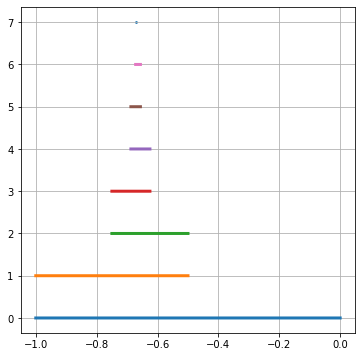

In [10]:
find_min(0.01)

x min:  -0.6645545959472656
f min:  -0.41619761066800587
number of iterations:  17
number of function calculations:  34


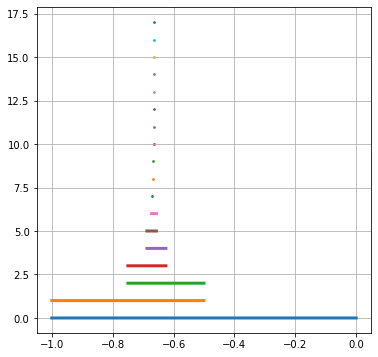

In [11]:
find_min(0.00001)

x min:  -1.4901161193851044e-08
f min:  0.17168716126391637
number of iterations:  67
number of function calculations:  134


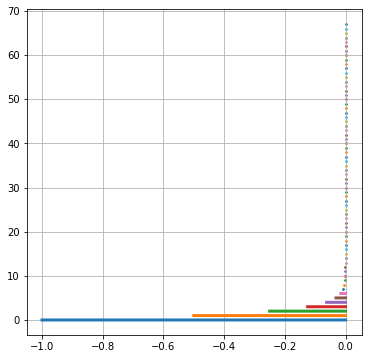

In [13]:
find_min(1e-20)

## Метод золотого сечения

In [ ]:
def golden_section(a, b, e, intervals):
    intervals.append([a, b])
    phi = (1 + np.sqrt(5))/2
    x1 = b - (b - a)/phi
    x2 = a + (b - a)/phi
    f1 = f(x1)
    f2 = f(x2)
    it = 0
#     while abs(abs(b) - abs(a)) >= e: # все чотко
    while abs(abs(b) - abs(a)) >= e: # 1e-17в бесокнечный цикл
        it += 1
        if it > 1000:
            break
        if f1 > f2:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b - (x1 - a)
            f2 = f(x2)
        else:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + (b - x2)
            f1 = f(x1)
        intervals.append([a, b])
    return (a + b)/2

x min:  -0.667184270002525
f min:  -0.41617528068364495
number of iterations:  9
number of function calculations:  10


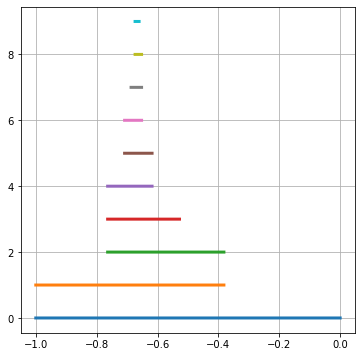

In [14]:
find_min(0.01, golden_section)

x min:  -0.6645540240261971
f min:  -0.4161976106613703
number of iterations:  23
number of function calculations:  24


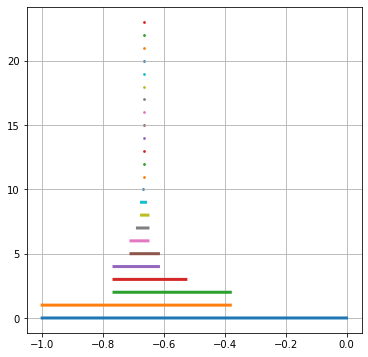

In [15]:
find_min(0.00001, golden_section)

In [ ]:
# find_min(1e-17, golden_section) # не работает если abs(b-a), работает если b-a

/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


x min:  1.2323019129469984e+192
f min:  nan
number of iterations:  1000
number of function calculations:  1001


NameError: name 'eps' is not defined